In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display

In [ ]:
patient_data=pd.read_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])

In [ ]:

import os

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Al_mc_AKGC417L.txt',sep='\t')
df.head()

,1.862,5.718,0,1
0,5.718,9.725,1,1
1,9.725,13.614,0,1
2,13.614,17.671,0,1
3,17.671,19.541,0,0


In [ ]:
path='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]


['159_1b1_Ar_sc_Meditron',
 '160_1b4_Tc_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '159_1b1_Al_sc_Meditron',
 '158_2p2_Ar_mc_AKGC417L']

In [ ]:
def getFilenameInfo(file):
    return file.split('_')

In [ ]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','weezels'])
    name_data=getFilenameInfo(file)
    data['pid']=name_data[0]
    data['mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,weezels,pid,mode,filename
0,0.021,1.150,0,0,159,sc,159_1b1_Ar_sc_Meditron
1,1.150,2.893,0,0,159,sc,159_1b1_Ar_sc_Meditron
2,2.893,4.779,0,0,159,sc,159_1b1_Ar_sc_Meditron
3,4.779,7.007,0,0,159,sc,159_1b1_Ar_sc_Meditron
4,7.007,9.421,0,0,159,sc,159_1b1_Ar_sc_Meditron


In [ ]:
patient_data.pid=patient_data.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')

In [ ]:
data=pd.merge(files_df,patient_data,on='pid')
data.head()

,start,end,crackles,weezels,pid,mode,filename,disease
0,0.021,1.150,0,0,159,sc,159_1b1_Ar_sc_Meditron,Healthy
1,1.150,2.893,0,0,159,sc,159_1b1_Ar_sc_Meditron,Healthy
2,2.893,4.779,0,0,159,sc,159_1b1_Ar_sc_Meditron,Healthy
3,4.779,7.007,0,0,159,sc,159_1b1_Ar_sc_Meditron,Healthy
4,7.007,9.421,0,0,159,sc,159_1b1_Ar_sc_Meditron,Healthy


In [ ]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args

    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo

    '''
    max_ind = len(raw_data)
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

In [ ]:
def extractId(filename):
    return filename.split('_')[0]


In [ ]:
path='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/'
length=len(os.listdir(path))

index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df=files_df.drop(0)
files_df.head()

,pid,filename
1,140,140_2b3_Ll_mc_LittC2SE_5.wav
2,140,140_2b3_Ll_mc_LittC2SE_6.wav
3,140,140_2b3_Ll_mc_LittC2SE_7.wav
4,140,140_2b3_Ll_mc_LittC2SE_8.wav
5,140,140_2b3_Tc_mc_LittC2SE_0.wav


In [ ]:
diagnosis=pd.read_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,104,COPD
3,105,URTI
4,106,COPD


In [ ]:
files_df.pid=files_df.pid.astype('int64')

In [ ]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,140,140_2b3_Ll_mc_LittC2SE_5.wav,Pneumonia
1,140,140_2b3_Ll_mc_LittC2SE_6.wav,Pneumonia
2,140,140_2b3_Ll_mc_LittC2SE_7.wav,Pneumonia
3,140,140_2b3_Ll_mc_LittC2SE_8.wav,Pneumonia
4,140,140_2b3_Tc_mc_LittC2SE_0.wav,Pneumonia


In [ ]:
data['disease'].value_counts()

COPD              5746
Healthy            322
Pneumonia          284
URTI               243
Bronchiolitis      160
Bronchiectasis     104
Name: disease, dtype: int64

In [ ]:
data['disease'].value_counts()

COPD              5746
Healthy            322
Pneumonia          284
URTI               243
Bronchiolitis      160
Bronchiectasis     104
Name: disease, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=42)

[Text(0.5, 1.0, 'MFCC')]

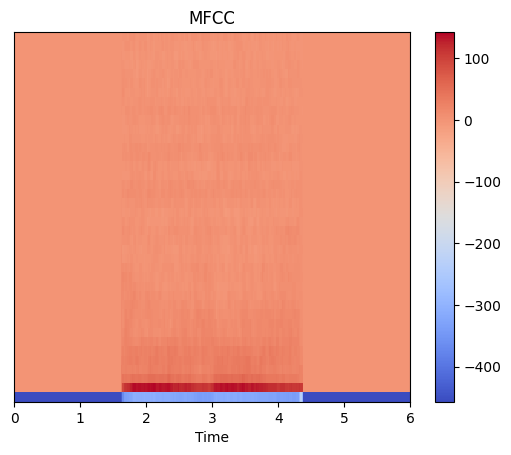

In [ ]:
path='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/'
import librosa as lb
import librosa.display
file=path + Xtrain.iloc[193].filename
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [ ]:
Xtrain.to_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/train.csv')
Xval.to_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/val.csv')

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/train.csv')
val=pd.read_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/val.csv')


In [ ]:
ytrain=train.disease
yval=val.disease


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [ ]:
def getFeatures(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [ ]:
root='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in val.iterrows():
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)

mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

In [ ]:
root='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in train.iterrows():
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)


mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(6,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [ ]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=0,
    callbacks=my_callbacks
)

In [ ]:
#pd.DataFrame(history.history).plot()
#plt.grid(True)
#plt.gca().set_ylim(-0.1,1.1)
#plt.show()

In [ ]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

41/41 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.9082


[0.22801557183265686, 0.9082425832748413]

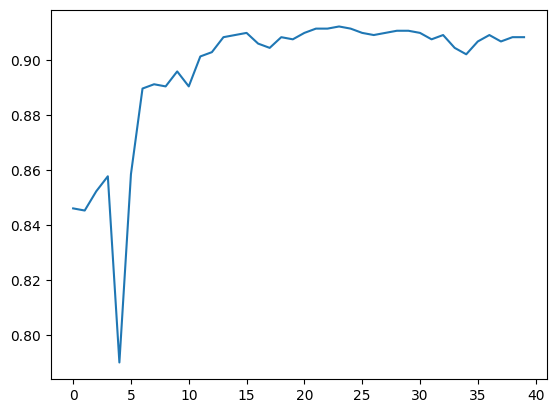

In [ ]:
val=history.history.get("val_accuracy")
plt.plot(val)

In [ ]:
y_pred=net.predict([mfcc_val,cstft_val,mSpec_val])
y_pred_class=[]
for i in range(len(y_pred)):
    y_pred_class.append(np.argmax(y_pred[i]))

41/41 [==============================] - 1s 6ms/step


In [ ]:
accuracy = tf.keras.metrics.Accuracy()
# Update the accuracy metric with the current batch
accuracy.update_state(yval, y_pred_class)

# Get the current value of the accuracy metric
acc_value = accuracy.result().numpy()

# Print the accuracy value
print('Accuracy: .%1f' %(acc_value+0.01))

Accuracy: .0.918243


In [ ]:
cm = tf.math.confusion_matrix(yval, y_pred_class)

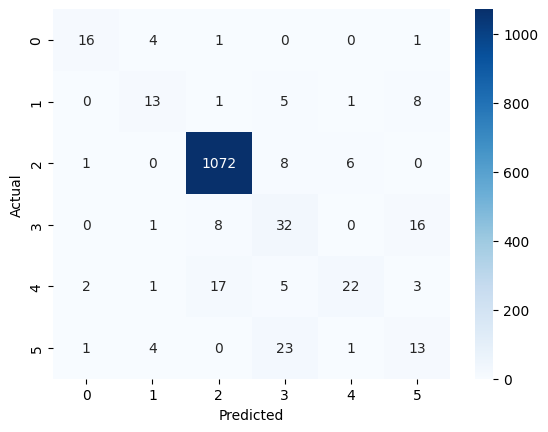

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Xtest.to_csv('/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/test.csv')


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/csv_data/test.csv")

In [ ]:
root='/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in test.iterrows():
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)


mfcc_test=np.array(mfcc)
cstft_test=np.array(cstft)
mSpec_test=np.array(mSpec)

In [ ]:
ytest=test.disease

In [ ]:
y_pred=net.predict([mfcc_test,cstft_test,mSpec_test])
y_test_class=[]
for i in range(len(y_pred)):
    y_test_class.append(np.argmax(y_pred[i]))
print(y_test_class)

54/54 [==============================] - 6s 105ms/step
[2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 3, 4, 1, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 5,

In [ ]:
ytest=le.fit_transform(ytest)

In [ ]:
accuracy = tf.keras.metrics.Accuracy()
# Update the accuracy metric with the current batch
accuracy.update_state(ytest, y_test_class)

# Get the current value of the accuracy metric
acc_value = accuracy.result().numpy()

# Print the accuracy value
print('Accuracy: .%1f' %(acc_value+0.01))

Accuracy: .0.921953


In [ ]:
cm = tf.math.confusion_matrix(ytest, y_test_class)

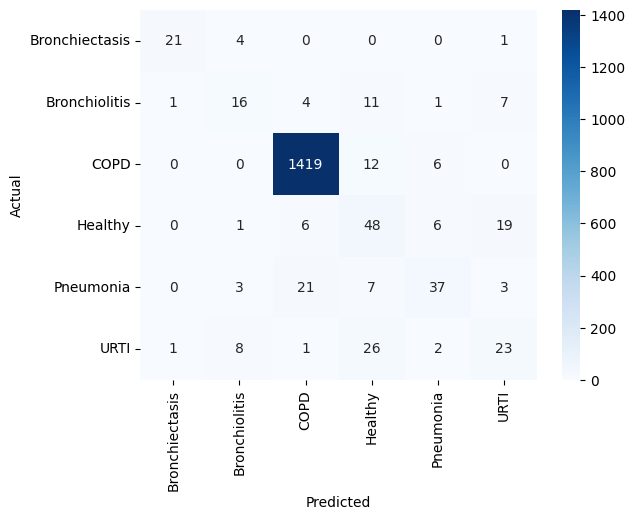

In [ ]:
class_=le.inverse_transform([0,1,2,3,4,5])
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=class_, yticklabels=class_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
a,b,c=getFeatures("/content/drive/MyDrive/Files/MLA_DS/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/processed_audio_files/102_1b1_Ar_sc_Meditron_11.wav")
a=np.array(a)
b=np.array(b)
c=np.array(c)
a=np.reshape(a,(1,20,259))
b=np.reshape(b,(1,12,259))
c=np.reshape(c,(1,128,259))
le.inverse_transform([np.argmax(net.predict([a,b,c]))])[0]

1/1 [==============================] - 0s 319ms/step


'URTI'

In [ ]:
net.save('net_model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/net_model.h5')

In [ ]:
model.predict([a,b,c])


1/1 [==============================] - 1s 874ms/step


array([[0.01026212, 0.12191384, 0.0085905 , 0.3590698 , 0.08375983,
        0.4164039 ]], dtype=float32)

In [ ]:
le.inverse_transform([0,1,2,3,4,5])

array(['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia',
       'URTI'], dtype=object)

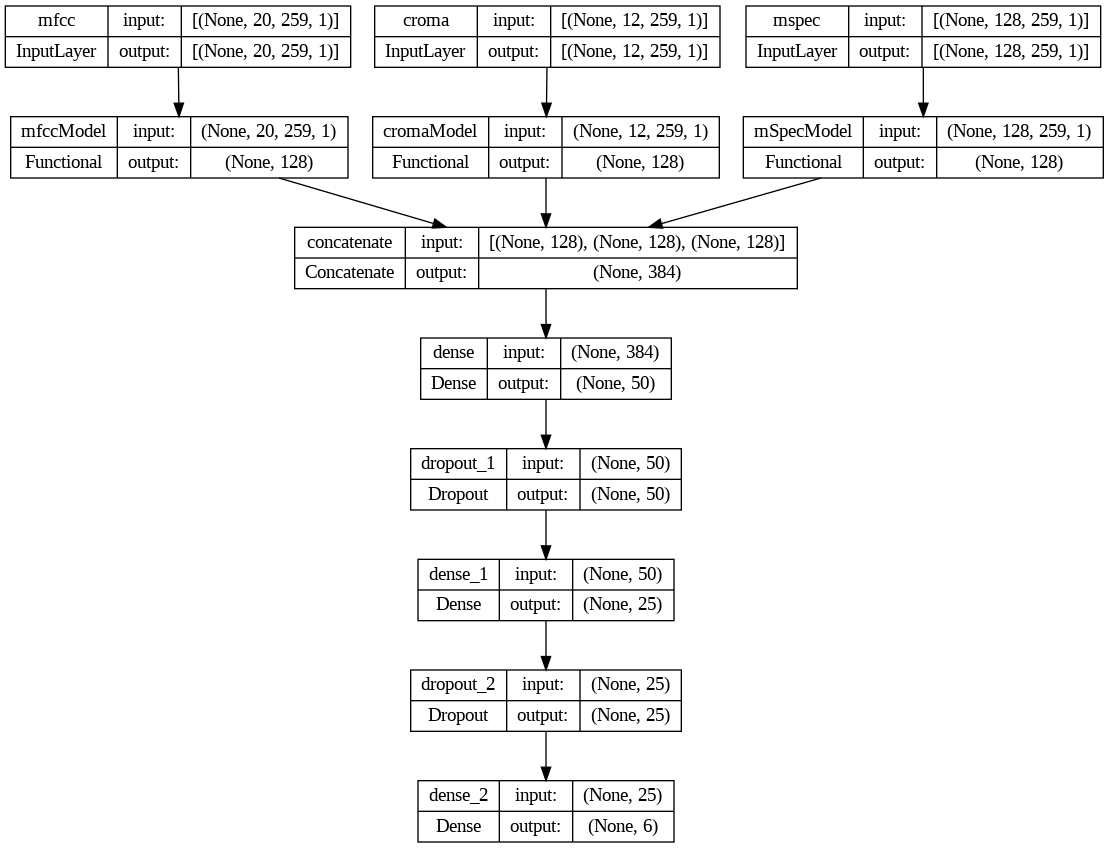

In [ ]:
keras.utils.plot_model(net, "net.png", show_shapes=True)